<a href="https://colab.research.google.com/github/Grecia329/EcuacionesDiferencialesParciales-/blob/main/M%C3%A9todo_Galerkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método Galerkin

Se va resolver el problema:

$$
-u''(x) + u(x) - x = 0,\qquad u(0)=0,\quad u(1)=0,
$$

A partir del **método de Galerkin**. Buscamos una solución aproximada de la forma :
$$
u_3(x) = \sum_{i=1}^3 \alpha_i \,\phi_i(x),
\qquad \phi_i(x)=\sin(i\pi x),
$$

Donde las funciones base $\phi_i$ satisfacen las condiciones de frontera
$u(0)=u(1)=0$.

Donde el método de Galerkin  define al residuo de la ecuación diferencial como:

$$
R(x) = -u_3''(x) + u_3(x) - x
$$

el cual sera ortogonal a cada función base, es decir:

$$
\int_0^1 R(x)\,\phi_j(x)\,dx = 0,\qquad j=1,2,3.
$$

Con estas condiciones se obtiene un sistema de ecuaciones lineales para las constantes
$\alpha_1,\alpha_2,\alpha_3$.

Finalmente, se compara la solución aproximada con la solución
analítica y se calcula el error numérico de la aproximación.

# Código

**Importaciones:**

In [1]:
# ======================================================
# Problema 5.12
#
# Cargamos las librerías que se usaran.
# ======================================================

import sympy as sp        # Cálculo simbólico
import numpy as np        # Trabajo numérico con arreglos
import matplotlib.pyplot as plt   # Gráficas
import pandas as pd       # Tablas de datos (para la tabla de errores)


**Planteamiento y Solución Analítica**

In [2]:
# ======================================================
# 1) Solución analítica:
#
#    -u''(x) + u(x) - x = 0
#    u(0) = 0,   u(1) = 0
#
# Usamos sympy.dsolve con condiciones de frontera.
# ======================================================

x = sp.symbols('x')       # variable independiente
u = sp.Function('u')      # función desconocida u(x)

# Definimos la ecuación diferencial -u'' + u - x = 0
ode = -sp.diff(u(x), x, 2) + u(x) - x

# Resolvemos la EDO con las condiciones de frontera u(0)=0, u(1)=0
sol_exact = sp.dsolve(ode, ics={u(0): 0, u(1): 0})

print("Solución analítica u(x):")
sp.pprint(sol_exact)

# Extraemos solo la expresión simbólica de u(x)
u_exact_expr = sol_exact.rhs
print("\nExpresión simplificada de u(x):")
sp.pprint(sp.simplify(u_exact_expr))

# Creamos una versión numérica de u(x) para evaluar en puntos
u_exact = sp.lambdify(x, u_exact_expr, "numpy")


Solución analítica u(x):
               x         -x 
            ℯ⋅ℯ       ℯ⋅ℯ   
u(x) = x - ─────── + ───────
                 2         2
           -1 + ℯ    -1 + ℯ 

Expresión simplificada de u(x):
⎛  ⎛     2⎞  x    2⋅x + 1    ⎞  -x
⎝x⋅⎝1 - ℯ ⎠⋅ℯ  + ℯ        - ℯ⎠⋅ℯ  
──────────────────────────────────
                   2              
              1 - ℯ               


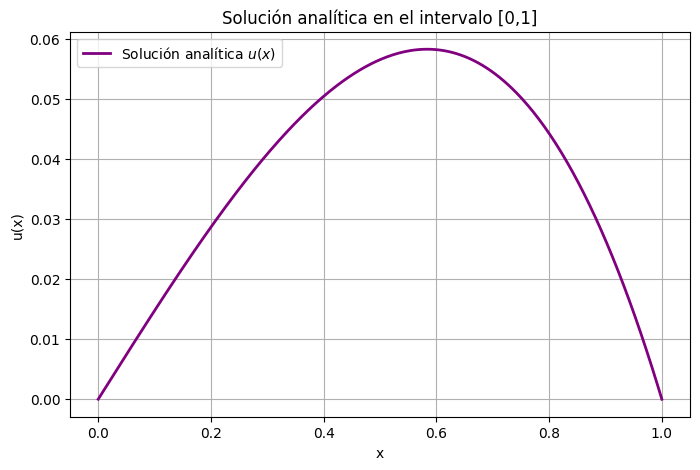

In [10]:
# ======================================================
# 1.1 Gráfica de la solución analítica u(x) en [0,1]
#
# En esta sección generamos una gráfica de la solución
# exacta obtenida con sympy.dsolve para visualizar su
# comportamiento en el intervalo de trabajo.
# ======================================================

# Creamos una malla de puntos en [0, 1]
x_vals = np.linspace(0, 1, 400)

# Evaluamos la solución exacta en la malla
y_exact_vals = u_exact(x_vals)

# Graficamos la solución analítica
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_exact_vals, linewidth=2, color="purple", label="Solución analítica $u(x)$")

# Etiquetas
plt.title("Solución analítica en el intervalo [0,1]")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()

plt.show()


Solución Analítica:

$$
u(x) = x - \frac{e^x}{2(1+e)} + \frac{e^{-x}}{2(e-1)}
$$

**Funciones base y aproximación de $u_3(x)$**

In [3]:
# ======================================================
# 2) Aproximación por el método de Galerkin
#
#    u_3(x) = α1 * φ1(x) + α2 * φ2(x) + α3 * φ3(x)
#    φ_i(x) = sin(i π x),  i = 1,2,3
#
# Las φ_i satisfacen las condiciones de frontera u(0)=u(1)=0.
# ======================================================

# Coeficientes desconocidos del método de Galerkin
alpha1, alpha2, alpha3 = sp.symbols('alpha1 alpha2 alpha3')

# Definimos las funciones base φ_i(x)
phi1 = sp.sin(sp.pi * x)
phi2 = sp.sin(2 * sp.pi * x)
phi3 = sp.sin(3 * sp.pi * x)

# Aproximación de orden 3
u3 = alpha1*phi1 + alpha2*phi2 + alpha3*phi3

print("Aproximación general u_3(x):")
sp.pprint(u3)

Aproximación general u_3(x):
α₁⋅sin(π⋅x) + α₂⋅sin(2⋅π⋅x) + α₃⋅sin(3⋅π⋅x)


**Residuo y ecuaciones de Galerkin**

In [4]:
# ======================================================
# 3) Residuo del método de Galerkin
#
#    R(x) = -u_3''(x) + u_3(x) - x
#
# Bajo la condición:
#    ∫_0^1 R(x) * φ_j(x) dx = 0 ,   j = 1,2,3.
# ======================================================

# Segunda derivada de u_3
u3_2 = sp.diff(u3, x, 2)

# Residuo de la ecuación diferencial
R = -u3_2 + u3 - x
R_simpl = sp.simplify(R)

print("Residuo R(x) = -u_3'' + u_3 - x:")
sp.pprint(R_simpl)

# Integramos R(x)*φ_j(x) en [0,1] para j = 1,2,3
eq1 = sp.integrate(R_simpl * phi1, (x, 0, 1))
eq2 = sp.integrate(R_simpl * phi2, (x, 0, 1))
eq3 = sp.integrate(R_simpl * phi3, (x, 0, 1))

print("\nIntegrales de Galerkin (antes de igualar a 0):")
print("∫ R φ1 =", eq1)
print("∫ R φ2 =", eq2)
print("∫ R φ3 =", eq3)


Residuo R(x) = -u_3'' + u_3 - x:
                                                   2                           ↪
α₁⋅sin(π⋅x) + α₂⋅sin(2⋅π⋅x) + α₃⋅sin(3⋅π⋅x) - x + π ⋅(α₁⋅sin(π⋅x) + 4⋅α₂⋅sin(2 ↪

↪                         
↪ ⋅π⋅x) + 9⋅α₃⋅sin(3⋅π⋅x))

Integrales de Galerkin (antes de igualar a 0):
∫ R φ1 = alpha1/2 + pi**2*alpha1/2 - 1/pi
∫ R φ2 = alpha2/2 + 2*pi**2*alpha2 + 1/(2*pi)
∫ R φ3 = alpha3/2 + 9*pi**2*alpha3/2 - 1/(3*pi)


**Sistema lineal para $\alpha_1, \alpha_2, \alpha_3$:**

In [5]:
# ======================================================
# 4) Sistema lineal de Galerkin
#
# Igualamos las integrales a cero:
#    ∫_0^1 R φ_j dx = 0,  j=1,2,3
# y resolvemos para α1, α2, α3.
# ======================================================

sol_alphas = sp.solve(
    [sp.Eq(eq1, 0), sp.Eq(eq2, 0), sp.Eq(eq3, 0)],
    [alpha1, alpha2, alpha3],
    simplify=True
)

print("Coeficientes α obtenidos por el método de Galerkin:")
sol_alphas

Coeficientes α obtenidos por el método de Galerkin:


{alpha1: 2/(pi + pi**3),
 alpha2: -1/(pi + 4*pi**3),
 alpha3: 2/(3*pi + 27*pi**3)}

**Aproximación final $u_3(x)$**

In [6]:
# ======================================================
# 5) Sustituimos los coeficientes en u_3(x)
#    y obtenemos la aproximación final.
# ======================================================

# Sustituimos α1, α2, α3 en u_3(x)
u3_approx_expr = sp.simplify(u3.subs(sol_alphas))

print("Aproximación final u_3(x) por Galerkin:")
sp.pprint(u3_approx_expr)

# Versión numérica de u_3(x) para evaluar y graficar
u3_approx = sp.lambdify(x, u3_approx_expr, "numpy")

Aproximación final u_3(x) por Galerkin:
2⋅sin(π⋅x)   sin(2⋅π⋅x)   2⋅sin(3⋅π⋅x)
────────── - ────────── + ────────────
       3             3              3 
  π + π       π + 4⋅π     3⋅π + 27⋅π  


$$
u_3(x) = \frac{2sin(πx)}{3(π+\pi)} - \frac{sin(2πx)}{3(π+4\pi)} + \frac{2sin(3πx)}{3(π+27\pi)}
$$

La solución aproximada obtenida por el método de Galerkin con tres funciones base es:

Simplificamos:
$$
u_3(x) = \frac{1}{3\pi}sin(\pi x) - \frac{1}{15\pi}sin(2\pi x) + \frac{1}{42\pi}sin(3 \pi x)
$$

# Gráfica:

**Gráfica de la Solución Analítica VS Galerkin**:

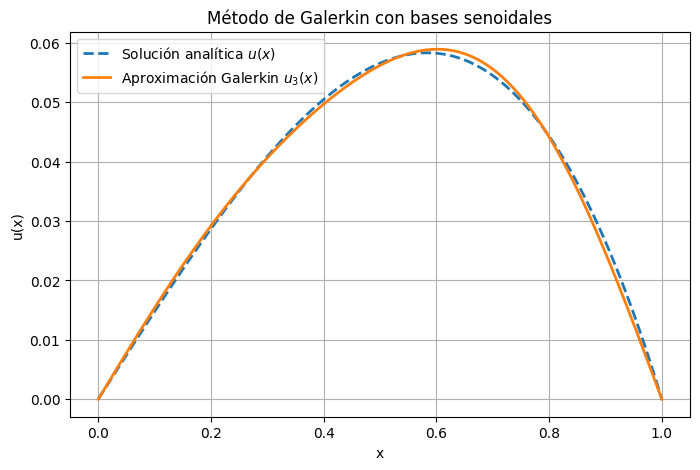

In [7]:
# ======================================================
# 6) Comparación gráfica de la solución analítica
#    y la aproximación de Galerkin en el intervalo [0,1].
# ======================================================

xx = np.linspace(0, 1, 400)

yy_exact = u_exact(xx)         # Solución analítica
yy_galerkin = u3_approx(xx)    # Aproximación Galerkin

plt.figure(figsize=(8, 5))
plt.plot(xx, yy_exact, "--", linewidth=2, label="Solución analítica $u(x)$")
plt.plot(xx, yy_galerkin, linewidth=2, label="Aproximación Galerkin $u_3(x)$")

plt.title("Método de Galerkin con bases senoidales")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

En la figura anterior se comparó la solución analítica del problema y la aproximación obtenida mediante el método de Galerkin utilizando tres funciones base sonoidales.

La mayor diferencia entre ambas soluciones es en la zona cercana al máximo, donde la curva analítica presenta un valor ligeramente mayor a la aproximación de Galerkin, sin embargo, la diferencia entre ambas curvas es muy pequeña, lo cual nos dice que el subespacio generado por $sin(\pi x), sin(2\pi x), sin(3\pi x)$ aproxima bien la solución del problema.

En general, la gráfica confirma visualmente que el método de Galerkin produce una aproximación bastante estable.

**Tabla de Errores (Galerkin VS Exacta):**

A continuación se va comparar la aproximación $u_3(x)$ con la solución analítica $u(x)$ en distintos puntos del intervalo [0,1].

Es decir, en cada punto seleccionado, se va calcular el error adsoluto:
$$
|u(x) - u_3(x)|
$$
Lo cual permite observar qué tan cerca se encuentra la aproximación respecto a la solución exacta.

La siguiente tabla muestra los valores evaluados y el error correspondiente en cada uno de los puntos.

In [8]:
# ======================================================
# 7) Tabla de errores: comparación entre
#    la solución analítica y la aproximación de Galerkin.
# ======================================================

# Puntos donde evaluamos el error:
puntos = np.array([0.0, 0.25, 0.50, 0.75, 1.0])

datos = {
    "x": puntos,
    "u_exacta(x)": u_exact(puntos),
    "u_Galerkin(x)": u3_approx(puntos),
}

df_err = pd.DataFrame(datos)
df_err["|error| = |u - u_3|"] = np.abs(df_err["u_exacta(x)"] - df_err["u_Galerkin(x)"])

df_err


,x,u_exacta(x),u_Galerkin(x),|error| = |u - u_3|
0,0.00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.25,3.504760e-02,3.522118e-02,1.735810e-04
2,0.50,5.659056e-02,5.620640e-02,3.841569e-04
3,0.75,5.027579e-02,5.094857e-02,6.727834e-04
4,1.00,1.387779e-16,9.966594e-18,1.288113e-16


**Cálculo del Error Máximo en [0,1]:**

A continuación se va evaluar la diferencia adsoluta:
$$
E_{\text{max}}=\text{max}_{x \in [0,1]}|u(x) - u_3(x)|
$$

Dicho valor nos define el comportamiento del error en todo el dominio y permite identificar qué tan buena es la aproximació. Un error máximo pequeño indica que la solución obtenida por el método de Galerkin se mantiene cercana a la solución exacta en todo el intervalo, lo cual confirma la estabilidad y eficacia del método.

In [9]:
# ======================================================
# 8) Cálculo del error máximo en el intervalo [0,1]
# ======================================================

err_vals = np.abs(yy_exact - yy_galerkin)
err_max = err_vals.max()

print(f"Error máximo en [0,1]: {err_max:.6e}")

Error máximo en [0,1]: 1.982314e-03


# Conclusión:

Durante el desarrollo de este trabajo se aplicó el método de Galerkin para aproximar la solución del problema:
$$
-u''(x) + u(x) - x =0, \quad u(0) = 0 , \quad u(1) = 0
$$
Utlizando tres funciones base senoidales $sin(\pi x), sin(2\pi x), sin(3\pi x)$. Este conjunto de funciones constituye un sistema ortogonal adecuado para capturar el comportamiento suave de la solución exacta en el intervalo [0,1].

Finalmente, el error máximo calculado en una malla fina del intervalo resulta ser del orden de $10^{-3}$, lo cual confirma que el método de Galerkin proporciona una aproximación altamente precisa. En conjunto, estos resultados muestran que el método es eficiente, estable y adecuado para resolver ecuaciones diferenciales lineales con condiciones de frontera cuando se busca una representación precisa de la solución.